In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string


zomato = pd.read_csv(r"zomato.csv")

In [2]:
'''print(zomato.columns)'''
'''print(zomato.head(2))'''
'''columns to exclude -> url, listed in type, listed in city, phone number, online_order and book_table = 'No' '''

zomato = zomato[~(zomato['book_table']=='No')]
zomato = zomato[~(zomato['book_table']=='No')]
zomato.drop(columns=['url', 'listed_in(type)', 'listed_in(city)','phone'],inplace= True)

'''print(zomato.columns)'''

zomato = zomato.fillna(0)
zomato['rate'] = zomato['rate'].astype(str).str[:3]

def extract_reviews(review) -> pd.Series:
    if not isinstance(review, str) or not review.strip():  
        return pd.Series([[], []]) 

    pattern = r"Rated (\d\.\d)', 'RATED\\n\s*(.*?)'\)"
    matches = re.findall(pattern, review)
    ratings = []
    reviews = []

    for match in matches:
        ratings.append(float(match[0]))
        reviews.append(match[1].strip())

    return pd.Series([ratings, reviews])

def extract_item_name(text):
    if not isinstance(text, str) or not text.strip():
        return ""  

    item_name = re.sub(r"\s*\[\s*\d+\s*pieces?\s*\]", "", text).strip()
    return item_name


zomato[['ratings', 'reviews']] = zomato['reviews_list'].apply(extract_reviews)
zomato.drop(columns=['reviews_list','ratings'], inplace = True)

zomato['item_name'] = zomato['menu_item'].apply(extract_item_name)
zomato.drop(columns=['menu_item','online_order','book_table'], inplace = True)
zomato['city'] = 'Bangalore'
zomato

,address,name,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews,item_name,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[A beautiful place to dine in.The interiors ta...,[],Bangalore
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,[I personally really liked this place ! The am...,[],Bangalore
11,"941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...",Cafe Shuffle,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,[This place is nice...i love the Ambience...th...,[],Bangalore
12,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,[Though the presentation of the place and food...,[],Bangalore
44,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,[I personally really liked this place ! The am...,[],Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...
51701,"Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...",The Beer Cafe,4.1,673,Whitefield,Pub,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...","Finger Food, North Indian, Chinese, Italian","1,400",[An clam and chilling out place with floks.......,[],Bangalore
51703,"ITPL Ascendas Park Square Mall, ITPL, First Fl...",Oliver's Pub & Diner,3.9,548,Whitefield,"Pub, Casual Dining","Pizza, Beer, Cocktails, Nachos, Pasta, Moo Bur...","Finger Food, American, Continental, Burger, Pizza","1,500",[I have been to this place couple of times now...,[],Bangalore
51704,"2nd Floor, Phoenix Market City, Whitefield, Ba...",Smaaash,4.0,189,Whitefield,"Casual Dining, Pub","Pizza, Beer","North Indian, Pizza, Chinese","1,500",[Like this place for zomato gold 2+2 on drinks...,[],Bangalore
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",[This pub is available near the bowling alley ...,[],Bangalore


In [116]:
print(swiggy.columns)

'''lowercase the column names, 
rate -> avg ratings, food type -> cuisine, remove delivery time, approx cost -> price, area -> location , 
city -> city , remove ID from swiggy, vote -> total ratings, restaurant -> name 

'''

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')


'lowercase the column names, \nrate -> avg ratings, food type -> cuisine, remove delivery time, approx cost -> price, area -> location , \ncity -> city , remove ID from swiggy, vote -> total ratings, restaurant -> name \n\n'

In [3]:
def clean_text(text):
    text = text.translate(str.maketrans("","", string.punctuation))
    words = text.lower().split()
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

In [4]:
review_text = ' '.join(zomato['reviews'].dropna().explode().astype(str))
review_text = clean_text(review_text)

KeyboardInterrupt: 

In [ ]:



wordcloud = WordCloud(
    width=800, height=400,
    background_color='black',
    colormap='coolwarm',
    max_words=100
).generate(review_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Dishes that people order from zomato")
plt.show()

KeyboardInterrupt: 

In [5]:
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap

# Define Zomato Red Gradient
zomato_red = LinearSegmentedColormap.from_list(
    'zomato_red_gradient',
    ['#fff5f5', '#ff9999', '#ff4d4d', '#e60000', '#990000']
)

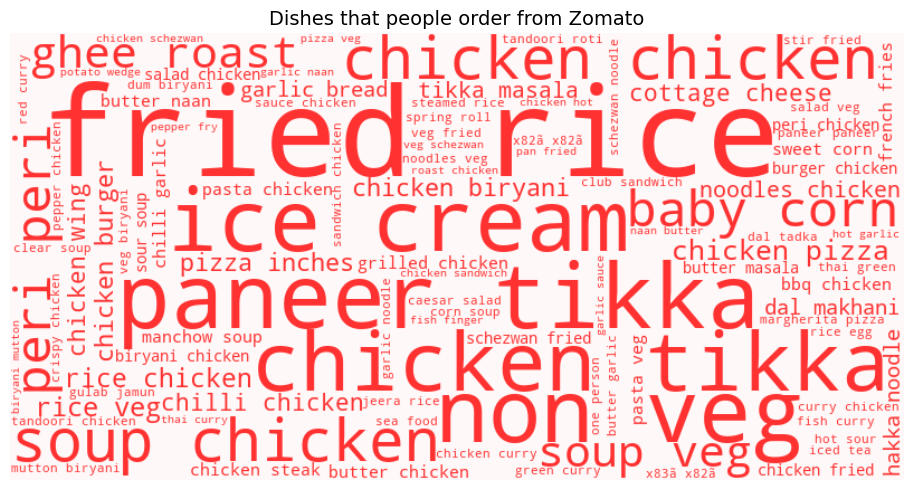

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text from both columns
text = ' '.join(zomato['dish_liked'].dropna().astype(str)) + ' ' + ' '.join(zomato['item_name'].dropna().explode().astype(str))
text = clean_text(text)

# Define a custom color function that returns a single red color
def red_color_func(*args, **kwargs):
    return "#ff3131"

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='#fff8f8',
    color_func=red_color_func,
    max_words=100
).generate(text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # Or try 'nearest' for sharper look
plt.axis("off")
plt.title("Dishes that people order from Zomato", fontsize=14)
plt.tight_layout()
plt.show()

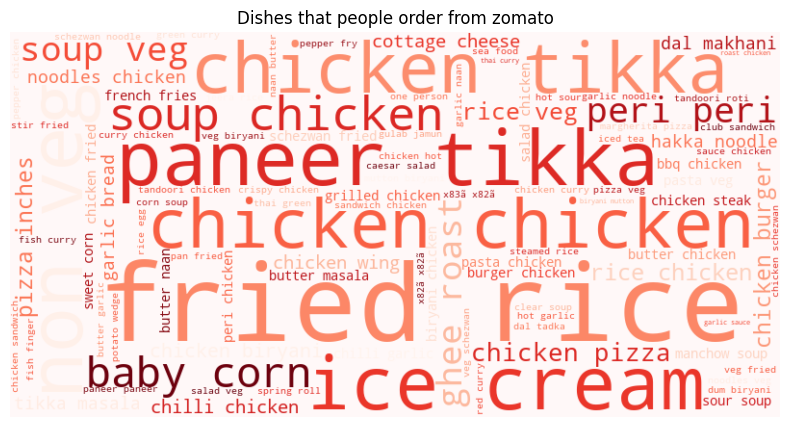

In [9]:
text = ' '.join(zomato['dish_liked'].dropna().astype(str)) + ' ' + ' '.join(zomato['item_name'].dropna().explode().astype(str))
text = clean_text(text)


wordcloud = WordCloud(
    width=800, height=400,
    background_color='#fff8f8',
    colormap='Reds',
    max_words=100
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Dishes that people order from zomato")
plt.show()